# Prueba 1: Análisis de Sentimientos de Twitter (Sebastián Rebolledo)

## Hito 1: Aspectos Computacionales

### Preliminares

#### En el siguiente ejercicio se realizará la clasificación de Tweet en positivos o negativos en funcion de los sentimientos que expresa. Para ello se implementarán distintos modelos de clasificación y se evaluara su desempeño.
 

- Las metricas que se utilizarán para medir el desempeño de los modelos serán Accuracy, precision y Recall. 
- Se realizará primeramente el preprocesamiento de las variables del vector sentiment, quedando esta variable con 0 y 1, donde 0 serán tweets con sentimientos negativos y 1 tweets con sentimientos positivos.
- Luego se realizará un preprocesamiento de palabras en el atributo 'content' utilizando CountVectorizarer.

### Modelos a implementar

- Regresion logistica.

- LinearDiscriminantAnalysis.

- Árbol de clasificación, en donde se implementara una grilla para buscar los mejores hiperparametros. A continuacion grilla tentativa.
    - params = {'max_depth':[10,30,50,70], }
    
- GradientBoostingClasifiers : Se implementara una grilla para buscar los mejores hiperparametros. A continuacion grilla tentativa.
    - params = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}.
                   
- AdaBoostClassifier: Se implementara una grilla para buscar los mejores hiperparametros. A continuacion grilla tentativa.
     - params = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import func as fn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('training_tweets.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


No se encuentran datos perdidos.

In [4]:
df.sentiment.value_counts()

neutral       6451
worry         6337
happiness     3952
sadness       3869
love          2908
surprise      1619
fun           1331
relief        1158
hate           975
empty          617
enthusiasm     559
boredom        135
anger           89
Name: sentiment, dtype: int64

A continuacion se recodificara el vector sentiment con un 0 para las emociones negativas y con un 1 para las emociones positivas.

In [5]:
fn.recod_sentiment(df,['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger'], 0)

In [6]:
fn.recod_sentiment(df,['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm'], 1)

Dentro del atributo sentiment, se encuentran tweets con la denominacion de 'neutral', lo que significa que no esta claro si son atributos positivos o negativos, por cual serán repartidos al azar entre positivos y negativos.

In [7]:
for index, valor in df[df['sentiment']== 'neutral']['content'].iteritems():
    #print(f'{index}-{valor}')
    df['sentiment'][index]=len(valor)%2

In [8]:
df.sentiment.value_counts()

0    15230
1    14770
Name: sentiment, dtype: int64

#### Distribucion del vector objetivo

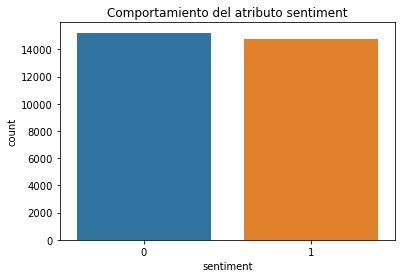

In [13]:
sns.countplot(x='sentiment', data=df)
plt.title('Comportamiento del atributo sentiment')
plt.show()

Se observa que hay una distribución de valores similar entre ambas clases.